<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (XIII): Using Cepheid Variable Stars to Determine the Distance to Messier 100 Spiral Galaxy & Estimate the Age of the Universe__


In [2]:
# Main Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Data
mean_mags = np.array([25, 25.6, 25.8, 25.5, 26.45, 26.6, 26.7, 25.8, 26.5, 25.6, 26.3, 26.3])
distances = np.array([18.11, 21.57, 20.89, 18.19, 23.98, 23.22, 25.94, 17.14, 18.79, 15.63, 20.7, 20.7])

# Reshape for sklearn
X = distances.reshape(-1, 1)
y = mean_mags

# Perform linear regression
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)


Linear Fit: Slope: 0.12, Intercept: 23.56


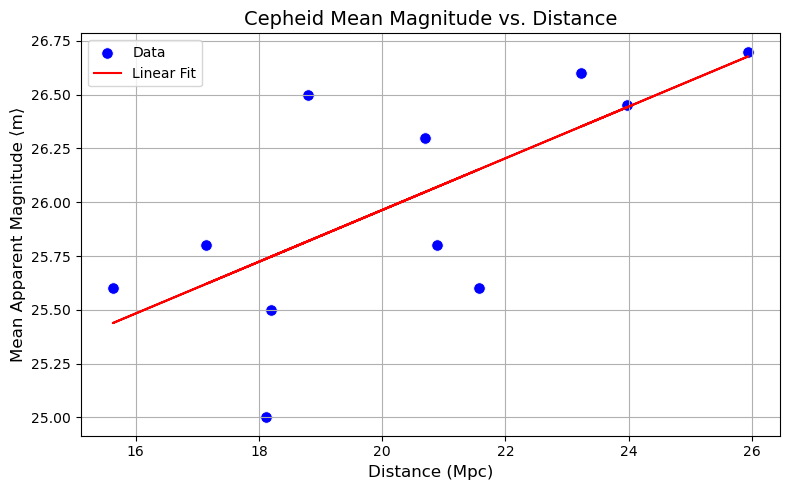

In [4]:
# Regression plot: Mean apparent magnitude vs. Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=distances, y=mean_mags, label='Data', s=70, color='blue')
plt.plot(distances, y_pred, color='red', label = 'Linear Fit')
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Mean Apparent Magnitude ⟨m⟩', fontsize=12)
plt.title('Cepheid Mean Magnitude vs. Distance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
print(f"Linear Fit: Slope: {reg.coef_[0]:.2f}, Intercept: {reg.intercept_:.2f}")
plt.show()

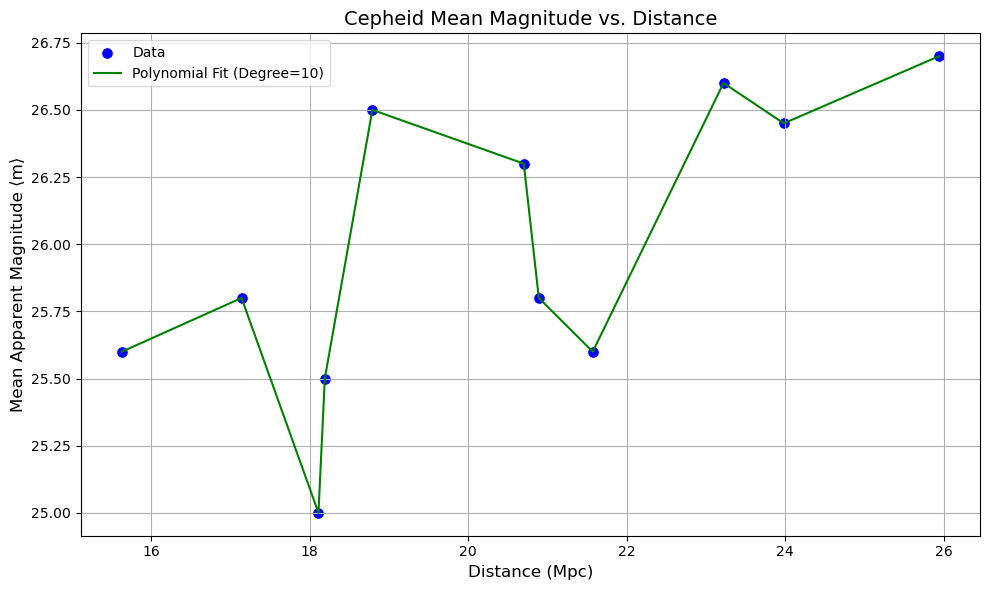

Polynomial Equation:         10         9         8         7       6         5         4
-27.18 x  + 11.57 x + 151.1 x - 32.98 x - 253 x + 11.92 x + 149.8 x
          3         2
 + 15.11 x - 24.57 x - 3.28 x + 26.86


In [5]:
# Normalize distances for numerical stability
scaler = StandardScaler()
distances_normalized = scaler.fit_transform(distances.reshape(-1, 1)).flatten()

# Polynomial fit (degree=10)
degree = 10
polynomial = np.poly1d(np.polyfit(distances_normalized, mean_mags, degree))
y_pred_poly = polynomial(distances_normalized)

# Sort for smooth plotting
sorted_indices = np.argsort(distances)
sorted_distances = distances[sorted_indices]
sorted_y_pred_poly = polynomial(scaler.transform(sorted_distances.reshape(-1, 1)).flatten())

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=distances, y=mean_mags, label='Data', s=70, color='blue')
plt.plot(sorted_distances, sorted_y_pred_poly, color='green', label=f'Polynomial Fit (Degree={degree})')
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Mean Apparent Magnitude ⟨m⟩', fontsize=12)
plt.title('Cepheid Mean Magnitude vs. Distance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print equation
print(f"Polynomial Equation: {polynomial}")

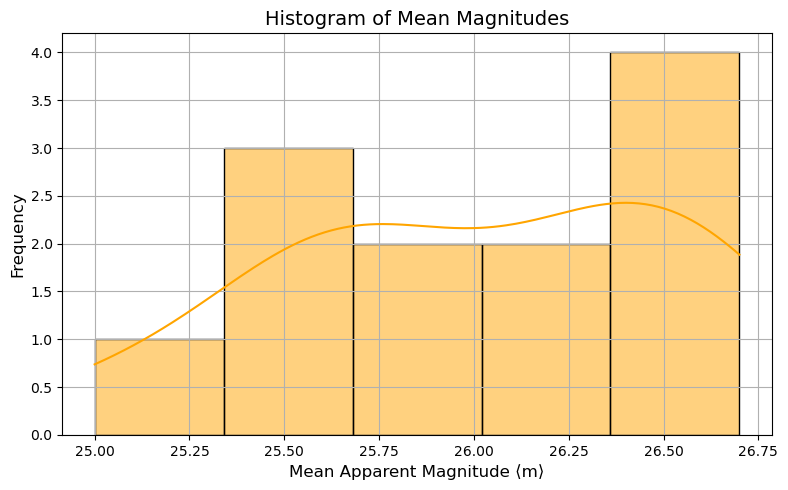

In [6]:
# Histogram of Mean Magnitudes ($\langle m \rangle$) ---
plt.figure(figsize=(8, 5))
sns.histplot(mean_mags, bins=5, kde=True, color='orange')
plt.xlabel('Mean Apparent Magnitude ⟨m⟩', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Mean Magnitudes', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

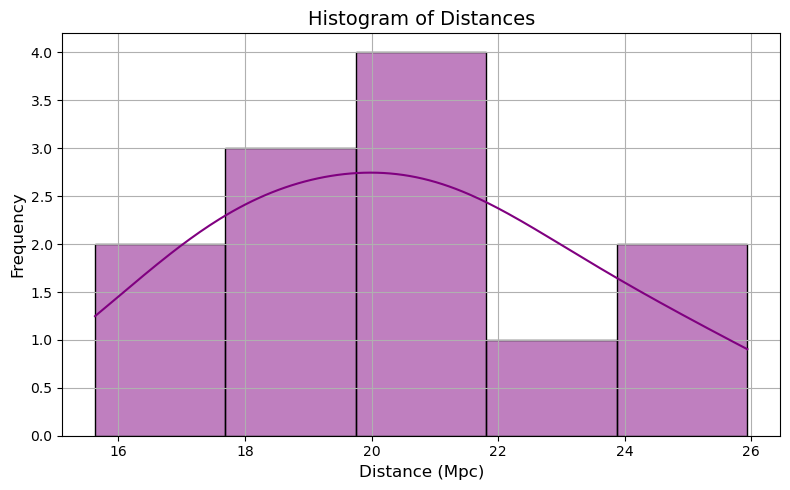

In [7]:
# Histogram of Distances 
plt.figure(figsize=(8, 5))
sns.histplot(distances, bins=5, kde=True, color='purple')
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Distances', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

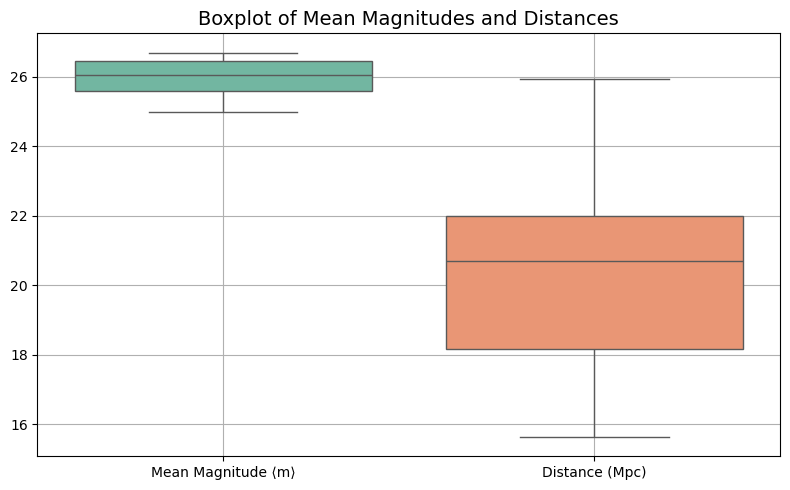

In [8]:
# Boxplot of <m> and d
plt.figure(figsize=(8, 5))
data_boxplot = {'Mean Magnitude ⟨m⟩': mean_mags, 'Distance (Mpc)': distances}
sns.boxplot(data=data_boxplot, palette='Set2')
plt.title('Boxplot of Mean Magnitudes and Distances', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

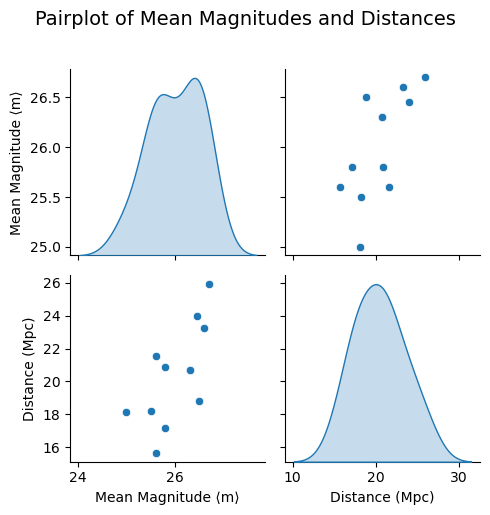

In [9]:
# Pairplot 
# Convert the dictionary to a pandas DataFrame
data_pairplot = pd.DataFrame({
    'Mean Magnitude ⟨m⟩': mean_mags,
    'Distance (Mpc)': distances
})

# Create the pairplot without palette
sns.pairplot(data_pairplot, diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Mean Magnitudes and Distances', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

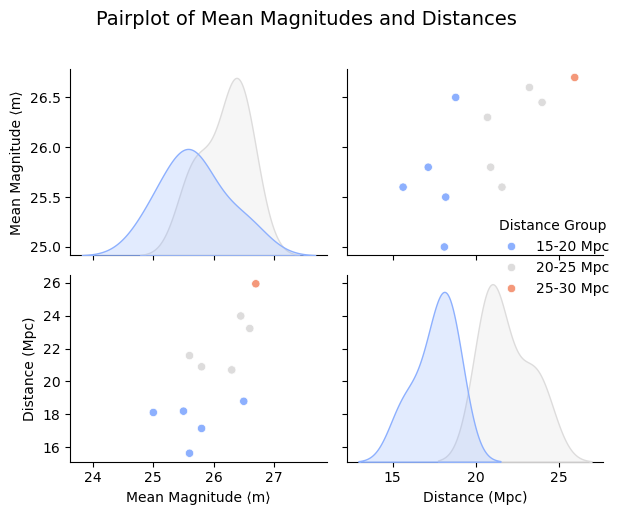

In [10]:
# Add a categorical variable (hue) based on distance ranges
data_pairplot['Distance Group'] = pd.cut(
    data_pairplot['Distance (Mpc)'],
    bins=[15, 20, 25, 30],
    labels=['15-20 Mpc', '20-25 Mpc', '25-30 Mpc']
)

# Create the pairplot with hue and palette
sns.pairplot(
    data_pairplot,
    diag_kind='kde',
    markers='o',
    hue='Distance Group',
    palette='coolwarm'
)
plt.suptitle('Pairplot of Mean Magnitudes and Distances', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

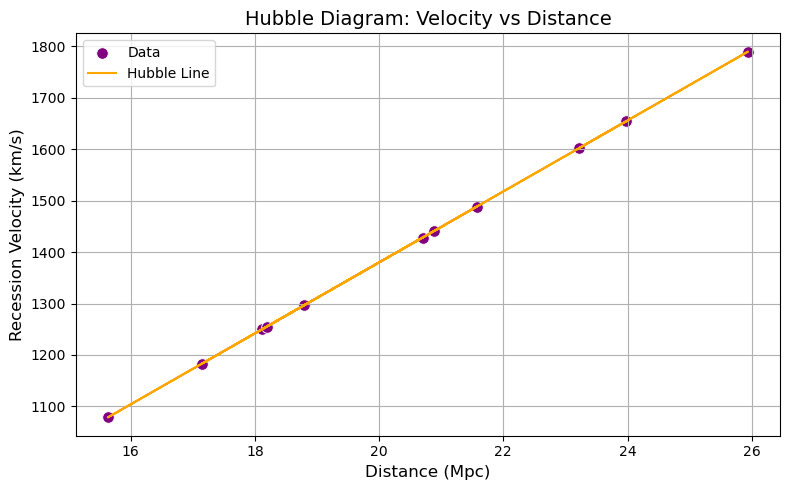

In [11]:
# Hubble plot: Recession Velocity vs. Distance
H_0 = 69  # km/s/Mpc
velocities = H_0 * distances  # v = H_0 * d

# Perform linear regression on Hubble plot
reg_hubble = LinearRegression()
reg_hubble.fit(distances.reshape(-1, 1), velocities)
velocities_pred = reg_hubble.predict(distances.reshape(-1, 1))

# Plot Hubble diagram
plt.figure(figsize=(8, 5))
sns.scatterplot(x=distances, y=velocities, label='Data', s=70, color='purple')
plt.plot(distances, velocities_pred, color='orange', label=f'Hubble Line')
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Recession Velocity (km/s)', fontsize=12)
plt.title('Hubble Diagram: Velocity vs Distance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()